## Comparison Between Convolutional Neural Networks and Fully Connected Networks

In this notebook we train two different and simple models on Cifar10 dataset: a fully connected network and a convolutional
neural network and compare their result:

170498071/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


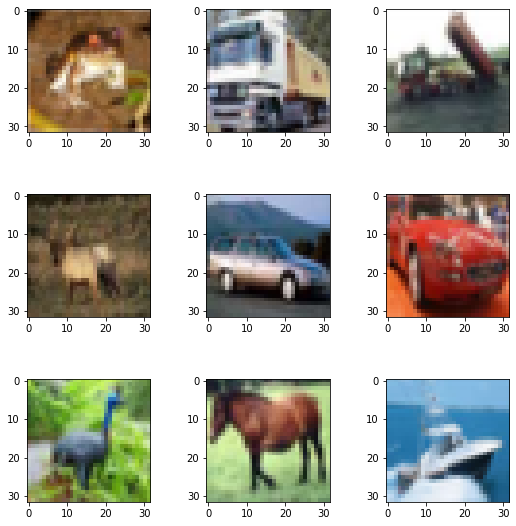

In [1]:
## preparing data:
import matplotlib .pyplot as plt
from keras.datasets import cifar10# load dataset
(trainX , trainy), (testX , testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape , trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape , testy.shape))
# define subplot
fig , ax = plt.subplots (3, 3)
# plot first few images
for i in range(9):
# plot raw pixel data
    ax[i//3, i%3]. imshow(trainX[i])
# show the figure
fig. tight_layout ()
fig. set_figheight (8)
fig. set_figwidth (8)
plt.show ()

In [2]:
import numpy as np
trainy_new=np.zeros((50000,10))
trainy_new[np.arange(50000).reshape(50000,1),trainy]=1

testy_new=np.zeros((10000,10))
testy_new[np.arange(10000).reshape(10000,1),testy]=1

### Fully Connected Network

In [6]:
from keras.layers import Dense,Flatten
from keras.models import Sequential
dense_model = Sequential (
    [
        Flatten(),
        Dense(2048 , input_dim =32*32*3 , activation ='relu', name='Dense_Layer_1'),
        Dense(1024 , activation ='relu', name='Dense_Layer_2'),
        Dense(512 , activation ='relu', name='Dense_Layer_3'),
        Dense(128 , activation ='relu', name='Dense_Layer_4'),
        Dense(10, activation ='softmax', name='Softmax_Output_Layer'),
],name='Dense_Model')
dense_model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])
# dense_model.summary()


Training and testing the network:

In [7]:
dense_model.fit(trainX,trainy_new,epochs=15)
test=dense_model.evaluate(testX,testy_new)
print("Accuracy: ",test[1]*100)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 12.3762 - accuracy: 0.2755
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8811 - accuracy: 0.3270
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8192 - accuracy: 0.3467
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7821 - accuracy: 0.3610
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7416 - accuracy: 0.3748
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7172 - accuracy: 0.3823
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6957 - accuracy: 0.3890
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6680 - accuracy: 0.4027
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6471 - accuracy: 0.4102
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.63

### Convolutional Network

In [12]:
from keras.layers import Conv2D,MaxPool2D

conv_model=Sequential(
    [
        Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(64,(3,3),activation='relu'),
        Flatten(),
     Dense(128,activation='relu'),
     Dense(10,activation='softmax')
    ]
)

conv_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
conv_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

Training and testing convolutional network:

In [13]:
conv_model.fit(trainX,trainy_new,epochs=15)
test_conv=conv_model.evaluate(testX,testy_new)
print('Accuracy: ',test_conv[1])

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4160 - accuracy: 0.3086
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4283 - accuracy: 0.4946
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1684 - accuracy: 0.5923
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9750 - accuracy: 0.6609
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7922 - accuracy: 0.7272
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6309 - accuracy: 0.7823
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4917 - accuracy: 0.8325
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3770 - accuracy: 0.8724
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3261 - accuracy: 0.8930
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.279